In [110]:
import pandas  as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

### Problems
-One null value in region column

-Prep and cooking time can not be -1 

-Some flavor columns are aslo -1 , which can be asined as unique Because they varies from person to person

-Diet column can be represented as  categorical column but is represented as object

-All states are randomly assinged there is no relation between food and state

In [111]:
df = pd.read_csv('indian_food.csv')

In [112]:
df.shape

(255, 9)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [114]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [115]:
df['diet'] = df['diet'].astype('category')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            255 non-null    object  
 1   ingredients     255 non-null    object  
 2   diet            255 non-null    category
 3   prep_time       255 non-null    int64   
 4   cook_time       255 non-null    int64   
 5   flavor_profile  255 non-null    object  
 6   course          255 non-null    object  
 7   state           255 non-null    object  
 8   region          254 non-null    object  
dtypes: category(1), int64(2), object(6)
memory usage: 16.4+ KB


In [117]:
df[df['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [118]:
df['region'] = df['region'].fillna("Central")

In [119]:
df['region'] = df['region'].replace('-1',"Central")

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            255 non-null    object  
 1   ingredients     255 non-null    object  
 2   diet            255 non-null    category
 3   prep_time       255 non-null    int64   
 4   cook_time       255 non-null    int64   
 5   flavor_profile  255 non-null    object  
 6   course          255 non-null    object  
 7   state           255 non-null    object  
 8   region          255 non-null    object  
dtypes: category(1), int64(2), object(6)
memory usage: 16.4+ KB


In [121]:
df['region'].unique()

array(['East', 'West', 'North', 'Central', 'North East', 'South'],
      dtype=object)

In [122]:
df[df['prep_time'] == -1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,-1,-1,spicy,main course,Maharashtra,West
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,-1,-1,spicy,snack,Gujarat,West


In [123]:
df['prep_time'] = df['prep_time'].replace(-1, int(df['prep_time'].mean()))

In [124]:
df[df['prep_time'] == -1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [125]:
df[df['cook_time'] == -1]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,31,-1,spicy,main course,Tripura,North East
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,31,-1,spicy,main course,Tamil Nadu,South
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,31,-1,spicy,main course,Tamil Nadu,South
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,31,-1,spicy,main course,Kerala,South
152,Poriyal,"Chana dal, urad dal, beans, coconut, mustard",vegetarian,31,-1,spicy,main course,Tamil Nadu,South
167,Kolim Jawla,"Baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,31,-1,spicy,main course,Maharashtra,West
172,Bombil fry,"Bombay duck, malvani masala, rice flour, bomba...",non vegetarian,31,-1,spicy,main course,Maharashtra,West
185,Ghooghra,"Dry fruits, semolina, all purpose flour",vegetarian,31,-1,spicy,snack,Gujarat,West
187,Halvasan,"Whole wheat rava, chia seed, lemon, edible gum...",vegetarian,31,-1,sweet,dessert,Gujarat,West
213,Mag Dhokli,"Moong beans, jaggery, red chillies, oil, salt",vegetarian,31,-1,spicy,snack,Gujarat,West


In [126]:
df['cook_time'] = df['cook_time'].replace(-1, int(df['cook_time'].mean()))

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            255 non-null    object  
 1   ingredients     255 non-null    object  
 2   diet            255 non-null    category
 3   prep_time       255 non-null    int64   
 4   cook_time       255 non-null    int64   
 5   flavor_profile  255 non-null    object  
 6   course          255 non-null    object  
 7   state           255 non-null    object  
 8   region          255 non-null    object  
dtypes: category(1), int64(2), object(6)
memory usage: 16.4+ KB


In [128]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,34.870588,38.372549
std,71.611230,46.643547
min,5.000000,2.000000
25%,10.000000,25.000000
50%,15.000000,30.000000
75%,30.000000,40.000000
max,500.000000,720.000000


In [129]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,31,34,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [130]:
df[df['flavor_profile'] == '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
78,Chapati,"Whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,-1,main course,Maharashtra,West
104,Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,-1,main course,Punjab,North
116,Rongi,"Garam masala powder, tomato, kasuri methi, cin...",vegetarian,10,30,-1,main course,Punjab,North
131,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,-1,snack,Kerala,South
145,Pachadi,"Coconut oil, cucumber, curd, curry leaves, mus...",vegetarian,10,25,-1,main course,-1,South
146,Paniyaram,"Yogurt, ginger, curry leaves, baking soda, gre...",vegetarian,10,20,-1,main course,Tamil Nadu,South
150,Paruppu sadam,"Arhar dal, sambar powder, tomato, curry leaves...",vegetarian,10,20,-1,main course,Tamil Nadu,South
153,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",vegetarian,10,20,-1,main course,Tamil Nadu,South
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,-1,main course,Kerala,South
157,Sandige,"Thin rice flakes, black sesame seeds, curry le...",vegetarian,120,60,-1,main course,Karnataka,South


In [131]:
df['flavor_profile'] = df['flavor_profile'].replace('-1', "Unique")

<Axes: >

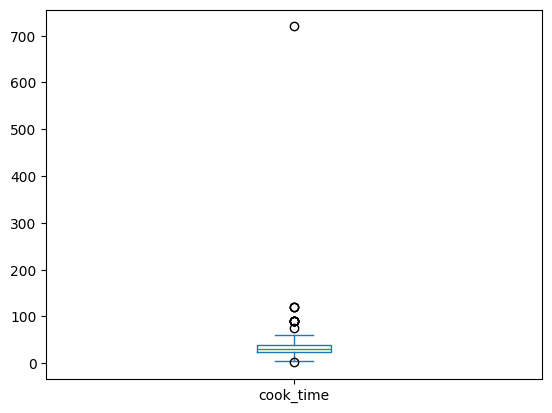

In [132]:
df['cook_time'].plot(kind='box')

In [133]:
df.drop(index=62,inplace=True)
df[df['cook_time'] > 700]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


<Axes: >

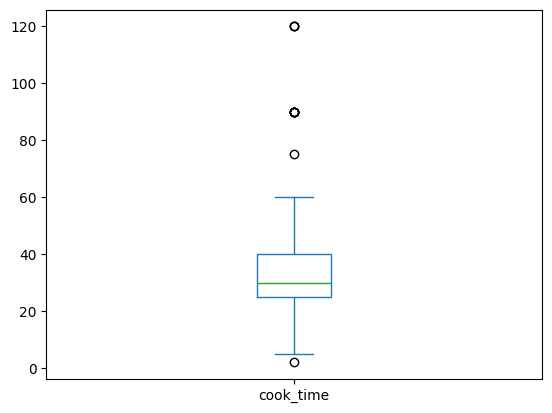

In [134]:
df['cook_time'].plot(kind='box')

<Axes: >

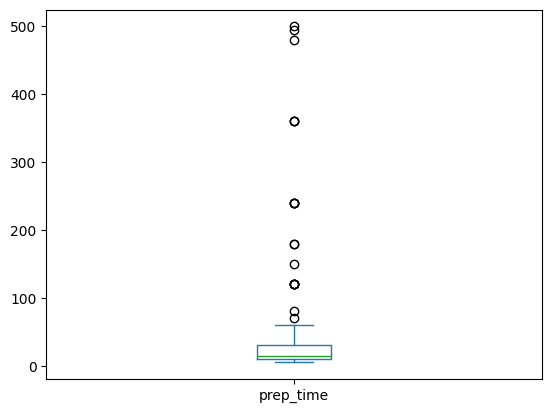

In [135]:
df['prep_time'].plot(kind='box')

In [136]:
df[df['prep_time'] > 100]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
33,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60,sweet,dessert,West Bengal,East
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East
81,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam ...",non vegetarian,120,45,spicy,starter,Punjab,North
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240,30,spicy,starter,Punjab,North
124,Attu,"Whole wheat flour, arhar dal, ginger, kala jee...",vegetarian,150,25,spicy,snack,Andhra Pradesh,South


In [137]:
df.loc[df['prep_time'] > 120 , 'prep_time'] = int(df['prep_time'].mean())

In [138]:
df[df['prep_time'] > 120]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [139]:
df = df.rename(columns={'flavor_profile':'flavour'})

In [140]:
df

,name,ingredients,diet,prep_time,cook_time,flavour,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,31,34,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [141]:
df[df['region'] == -1]

,name,ingredients,diet,prep_time,cook_time,flavour,course,state,region


<Axes: ylabel='Frequency'>

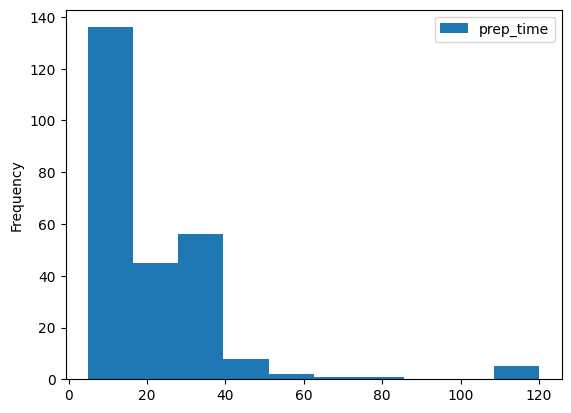

In [142]:
df.plot(x='cook_time',kind='hist')

In [143]:
df

,name,ingredients,diet,prep_time,cook_time,flavour,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,31,34,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


C:\Temp\ipykernel_9420\249681225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['prep_time'].mean().plot(kind='bar')


<Axes: xlabel='diet'>

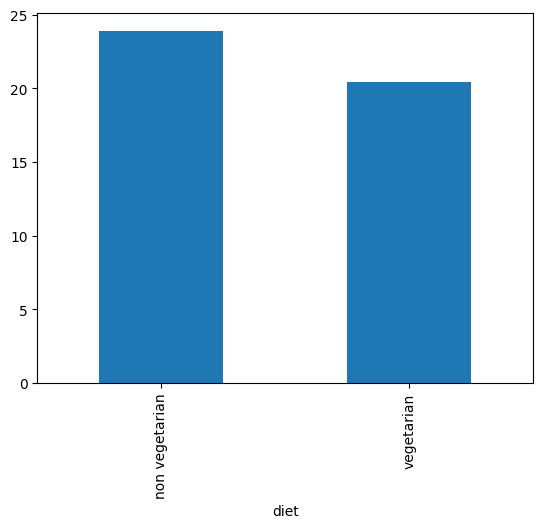

In [144]:
df.groupby('diet')['prep_time'].mean().plot(kind='bar')


C:\Temp\ipykernel_9420\3460817169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['cook_time'].mean().plot(kind='bar')


<Axes: xlabel='diet'>

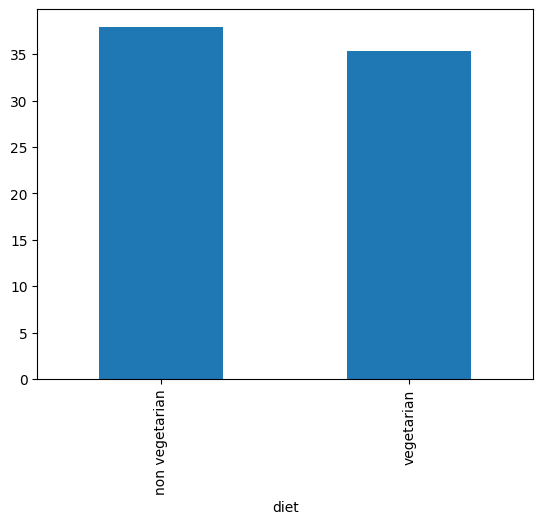

In [145]:
df.groupby('diet')['cook_time'].mean().plot(kind='bar')

C:\Temp\ipykernel_9420\2236145018.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diet')['total_time'].mean().plot(kind='bar')


<Axes: xlabel='diet'>

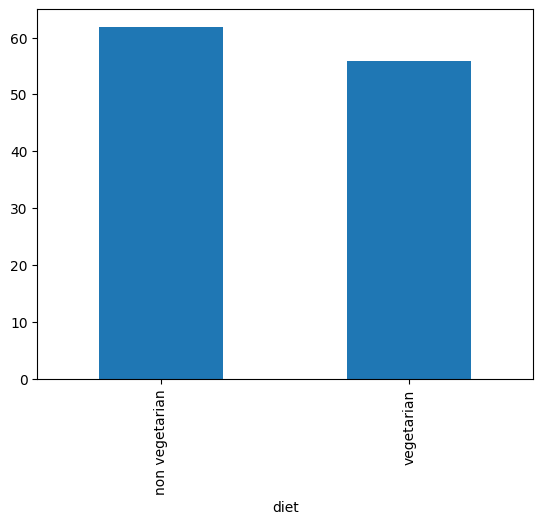

In [146]:
df['total_time'] = df['prep_time'] + df['cook_time']

df.groupby('diet')['total_time'].mean().plot(kind='bar')

<Axes: xlabel='course'>

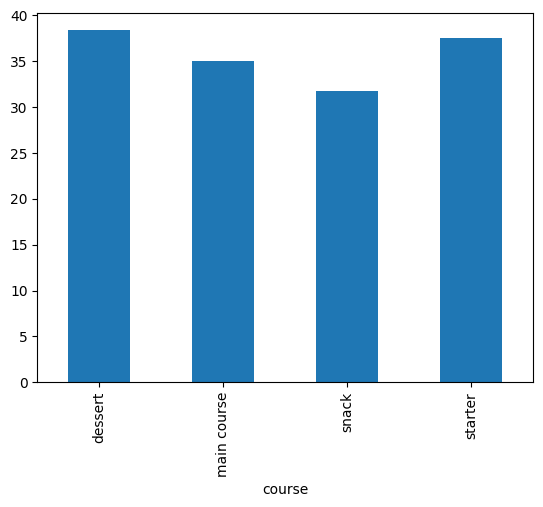

In [147]:
df.groupby('course')['cook_time'].mean().plot(kind='bar')

In [148]:
df

,name,ingredients,diet,prep_time,cook_time,flavour,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55
...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,35
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,80
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,31,34,sweet,dessert,Jammu & Kashmir,North,65
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,65


In [ ]:
table = pd.crosstab(df['region'], df['course'])

<Axes: xlabel='region'>

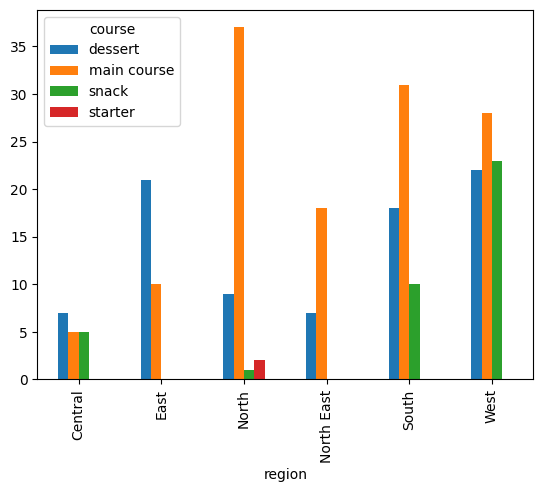

In [154]:
table.plot(kind='bar')


<Axes: xlabel='region'>

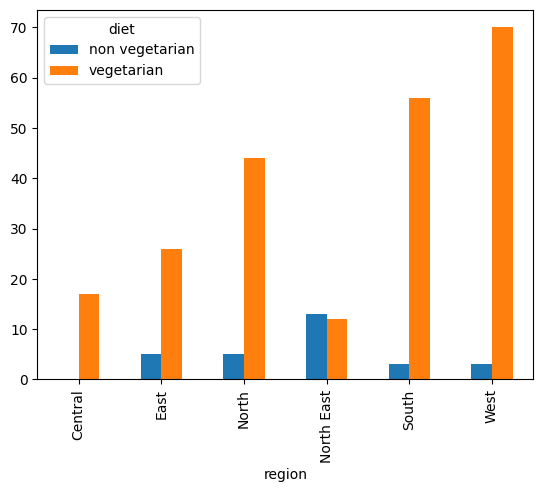

In [155]:
table = pd.crosstab(df['region'], df['diet'])
table.plot(kind='bar')